# Notebook preparation


In [1]:
!pip install langchain
!pip install --quiet langchain_experimental langchain_openai
!pip install sentence-transformers
!pip install --upgrade --quiet langchain-text-splitters tiktoken

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.1/809.1 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.8/258.8 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 2.4 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
      Successfully uninstalled packaging-24.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.5/257.5 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━

Importing the text document ...

In [2]:
!wget https://huggingface.co/datasets/rewoo/sotu_qa_2023/raw/main/state_of_the_union.txt

--2024-03-14 12:11:39--  https://huggingface.co/datasets/rewoo/sotu_qa_2023/raw/main/state_of_the_union.txt
Resolving huggingface.co (huggingface.co)... 18.172.134.4, 18.172.134.88, 18.172.134.124, ...
Connecting to huggingface.co (huggingface.co)|18.172.134.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42625 (42K) [text/plain]
Saving to: ‘state_of_the_union.txt’

state_of_the_union. 100%[===================>]  41.63K  --.-KB/s    in 0.009s  

2024-03-14 12:11:39 (4.35 MB/s) - ‘state_of_the_union.txt’ saved [42625/42625]



Import libraries

In [33]:
from langchain.text_splitter import CharacterTextSplitter
import matplotlib.pyplot as plt
from langchain_experimental.text_splitter import SemanticChunker
from langchain_community.embeddings import HuggingFaceEmbeddings

In [39]:
with open('state_of_the_union.txt') as f:
    text = f.read()

In [40]:
text

'Following is a transcript of President Biden’s State of the Union address in 2023.\n\nMr. Speaker. Madam Vice President. Our First Lady and Second Gentleman.\n\nMembers of Congress and the Cabinet. Leaders of our military.\n\nMr. Chief Justice, Associate Justices, and retired Justices of the Supreme Court.\n\nAnd you, my fellow Americans.\n\nI start tonight by congratulating the members of the 118th Congress and the new Speaker of the House, Kevin McCarthy.\n\nMr. Speaker, I look forward to working together.\n\nI also want to congratulate the new leader of the House Democrats and the first Black House Minority Leader in history, Hakeem Jeffries.\n\nCongratulations to the longest serving Senate Leader in history, Mitch McConnell.\n\nAnd congratulations to Chuck Schumer for another term as Senate Majority Leader, this time with an even bigger majority.\n\nAnd I want to give special recognition to someone who I think will be considered the greatest Speaker in the history of this country,

# Split by character

We'll start by chunking by using a character split strategy

In [49]:
text_splitter = CharacterTextSplitter(
       separator = "\n\n",
       chunk_size = 350,
       chunk_overlap = 50,
       length_function = len,
       is_separator_regex = False)
docs = text_splitter.create_documents([text])

In [50]:
print(docs[0].page_content)

Following is a transcript of President Biden’s State of the Union address in 2023.

Mr. Speaker. Madam Vice President. Our First Lady and Second Gentleman.

Members of Congress and the Cabinet. Leaders of our military.

Mr. Chief Justice, Associate Justices, and retired Justices of the Supreme Court.

And you, my fellow Americans.


In [51]:
print(docs[1].page_content)

And you, my fellow Americans.

I start tonight by congratulating the members of the 118th Congress and the new Speaker of the House, Kevin McCarthy.

Mr. Speaker, I look forward to working together.

I also want to congratulate the new leader of the House Democrats and the first Black House Minority Leader in history, Hakeem Jeffries.


In [52]:
len("And you, my fellow Americans.")

29

Number of chunks found

In [56]:
len(docs)

150

In [54]:
for i, item in enumerate(docs):
    print(f"Chunk N°{i} -> {len(item.page_content)}")

Chunk N°0 -> 332
Chunk N°1 -> 336
Chunk N°2 -> 203
Chunk N°3 -> 297
Chunk N°4 -> 210
Chunk N°5 -> 335
Chunk N°6 -> 191
Chunk N°7 -> 297
Chunk N°8 -> 280
Chunk N°9 -> 222
Chunk N°10 -> 240
Chunk N°11 -> 341
Chunk N°12 -> 341
Chunk N°13 -> 286
Chunk N°14 -> 200
Chunk N°15 -> 347
Chunk N°16 -> 329
Chunk N°17 -> 334
Chunk N°18 -> 297
Chunk N°19 -> 218
Chunk N°20 -> 243
Chunk N°21 -> 304
Chunk N°22 -> 323
Chunk N°23 -> 350
Chunk N°24 -> 269
Chunk N°25 -> 300
Chunk N°26 -> 175
Chunk N°27 -> 295
Chunk N°28 -> 319
Chunk N°29 -> 282
Chunk N°30 -> 186
Chunk N°31 -> 305
Chunk N°32 -> 310
Chunk N°33 -> 292
Chunk N°34 -> 304
Chunk N°35 -> 327
Chunk N°36 -> 245
Chunk N°37 -> 262
Chunk N°38 -> 190
Chunk N°39 -> 266
Chunk N°40 -> 300
Chunk N°41 -> 333
Chunk N°42 -> 274
Chunk N°43 -> 330
Chunk N°44 -> 246
Chunk N°45 -> 255
Chunk N°46 -> 349
Chunk N°47 -> 277
Chunk N°48 -> 299
Chunk N°49 -> 325
Chunk N°50 -> 322
Chunk N°51 -> 336
Chunk N°52 -> 296
Chunk N°53 -> 322
Chunk N°54 -> 305
Chunk N°55 -> 342
Ch

Let's look at the the chunk distribution (by size)

<BarContainer object of 150 artists>

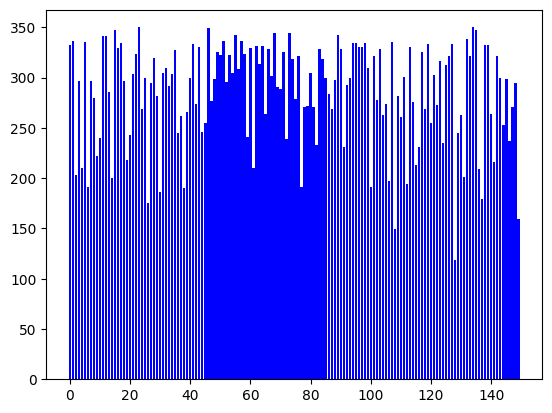

In [57]:
Y = [ len(y.page_content) for y in docs]
plt.bar(range(len(docs)), Y, color="b")

Chunk example

In [8]:
docs[0]

Document(page_content='Following is a transcript of President Biden’s State of the Union address in 2023.\n\nMr. Speaker. Madam Vice President. Our First Lady and Second Gentleman.\n\nMembers of Congress and the Cabinet. Leaders of our military.\n\nMr. Chief Justice, Associate Justices, and retired Justices of the Supreme Court.\n\nAnd you, my fellow Americans.\n\nI start tonight by congratulating the members of the 118th Congress and the new Speaker of the House, Kevin McCarthy.\n\nMr. Speaker, I look forward to working together.\n\nI also want to congratulate the new leader of the House Democrats and the first Black House Minority Leader in history, Hakeem Jeffries.\n\nCongratulations to the longest serving Senate Leader in history, Mitch McConnell.\n\nAnd congratulations to Chuck Schumer for another term as Senate Majority Leader, this time with an even bigger majority.\n\nAnd I want to give special recognition to someone who I think will be considered the greatest Speaker in the hi

In [9]:
docs[0].page_content

'Following is a transcript of President Biden’s State of the Union address in 2023.\n\nMr. Speaker. Madam Vice President. Our First Lady and Second Gentleman.\n\nMembers of Congress and the Cabinet. Leaders of our military.\n\nMr. Chief Justice, Associate Justices, and retired Justices of the Supreme Court.\n\nAnd you, my fellow Americans.\n\nI start tonight by congratulating the members of the 118th Congress and the new Speaker of the House, Kevin McCarthy.\n\nMr. Speaker, I look forward to working together.\n\nI also want to congratulate the new leader of the House Democrats and the first Black House Minority Leader in history, Hakeem Jeffries.\n\nCongratulations to the longest serving Senate Leader in history, Mitch McConnell.\n\nAnd congratulations to Chuck Schumer for another term as Senate Majority Leader, this time with an even bigger majority.\n\nAnd I want to give special recognition to someone who I think will be considered the greatest Speaker in the history of this country,

Aggregate the chunk's content in a list

In [10]:
chunksTable = [ x.page_content for x in docs]

# Semantic chunk

In [58]:
hf_embeddings = HuggingFaceEmbeddings()
model_name = "sentence-transformers/all-mpnet-base-v2"
model_kwargs = {'device': 'cpu'}
# or if GPU ...
# model_kwargs = {'device': 'cuda'}
encode_kwargs = {'normalize_embeddings': False}
hf_embeddings = HuggingFaceEmbeddings(
        model_name=model_name,
        model_kwargs=model_kwargs,
        encode_kwargs=encode_kwargs,
    )
text_splitter = SemanticChunker(hf_embeddings)
docs = text_splitter.create_documents([text])

In [61]:
len(docs)

30

In [24]:
docs[0].page_content

'Following is a transcript of President Biden’s State of the Union address in 2023. Mr. Speaker. Madam Vice President. Our First Lady and Second Gentleman. Members of Congress and the Cabinet. Leaders of our military. Mr. Chief Justice, Associate Justices, and retired Justices of the Supreme Court. And you, my fellow Americans. I start tonight by congratulating the members of the 118th Congress and the new Speaker of the House, Kevin McCarthy. Mr. Speaker, I look forward to working together. I also want to congratulate the new leader of the House Democrats and the first Black House Minority Leader in history, Hakeem Jeffries. Congratulations to the longest serving Senate Leader in history, Mitch McConnell. And congratulations to Chuck Schumer for another term as Senate Majority Leader, this time with an even bigger majority. And I want to give special recognition to someone who I think will be considered the greatest Speaker in the history of this country, Nancy Pelosi. The story of Am

In [62]:
for i, item in enumerate(docs):
    print(f"Chunk N°{i} -> {len(item.page_content)}")

Chunk N°0 -> 3523
Chunk N°1 -> 362
Chunk N°2 -> 90
Chunk N°3 -> 2910
Chunk N°4 -> 934
Chunk N°5 -> 490
Chunk N°6 -> 2406
Chunk N°7 -> 50
Chunk N°8 -> 4116
Chunk N°9 -> 229
Chunk N°10 -> 63
Chunk N°11 -> 2679
Chunk N°12 -> 13
Chunk N°13 -> 548
Chunk N°14 -> 1827
Chunk N°15 -> 4171
Chunk N°16 -> 57
Chunk N°17 -> 1814
Chunk N°18 -> 329
Chunk N°19 -> 1556
Chunk N°20 -> 78
Chunk N°21 -> 2905
Chunk N°22 -> 315
Chunk N°23 -> 3242
Chunk N°24 -> 199
Chunk N°25 -> 2422
Chunk N°26 -> 2884
Chunk N°27 -> 525
Chunk N°28 -> 959
Chunk N°29 -> 27


<BarContainer object of 30 artists>

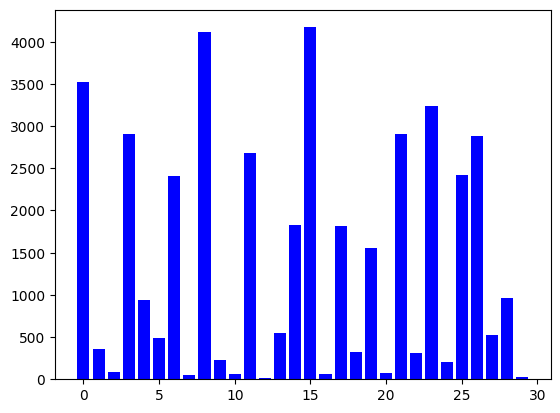

In [63]:
Y = [ len(y.page_content) for y in docs]
plt.bar(range(len(docs)), Y, color="b")

# Token chunk

In [74]:
text_splitter = CharacterTextSplitter.from_tiktoken_encoder(
    chunk_size=350,
    chunk_overlap=50
)
docs = text_splitter.split_text(text)

In [75]:
len(docs)

32

In [76]:
docs[0]

'Following is a transcript of President Biden’s State of the Union address in 2023.\n\nMr. Speaker. Madam Vice President. Our First Lady and Second Gentleman.\n\nMembers of Congress and the Cabinet. Leaders of our military.\n\nMr. Chief Justice, Associate Justices, and retired Justices of the Supreme Court.\n\nAnd you, my fellow Americans.\n\nI start tonight by congratulating the members of the 118th Congress and the new Speaker of the House, Kevin McCarthy.\n\nMr. Speaker, I look forward to working together.\n\nI also want to congratulate the new leader of the House Democrats and the first Black House Minority Leader in history, Hakeem Jeffries.\n\nCongratulations to the longest serving Senate Leader in history, Mitch McConnell.\n\nAnd congratulations to Chuck Schumer for another term as Senate Majority Leader, this time with an even bigger majority.\n\nAnd I want to give special recognition to someone who I think will be considered the greatest Speaker in the history of this country,

In [77]:
for i, item in enumerate(docs):
  print(f"Chunk N°{i} -> {len(item)}")

Chunk N°0 -> 1608
Chunk N°1 -> 1475
Chunk N°2 -> 1337
Chunk N°3 -> 1509
Chunk N°4 -> 1465
Chunk N°5 -> 1470
Chunk N°6 -> 1382
Chunk N°7 -> 1553
Chunk N°8 -> 1480
Chunk N°9 -> 1635
Chunk N°10 -> 1439
Chunk N°11 -> 1505
Chunk N°12 -> 1565
Chunk N°13 -> 1431
Chunk N°14 -> 1553
Chunk N°15 -> 1436
Chunk N°16 -> 1537
Chunk N°17 -> 1423
Chunk N°18 -> 1565
Chunk N°19 -> 1401
Chunk N°20 -> 1551
Chunk N°21 -> 1421
Chunk N°22 -> 1561
Chunk N°23 -> 1501
Chunk N°24 -> 1581
Chunk N°25 -> 1534
Chunk N°26 -> 1569
Chunk N°27 -> 1481
Chunk N°28 -> 1358
Chunk N°29 -> 1441
Chunk N°30 -> 1504
Chunk N°31 -> 285


<BarContainer object of 32 artists>

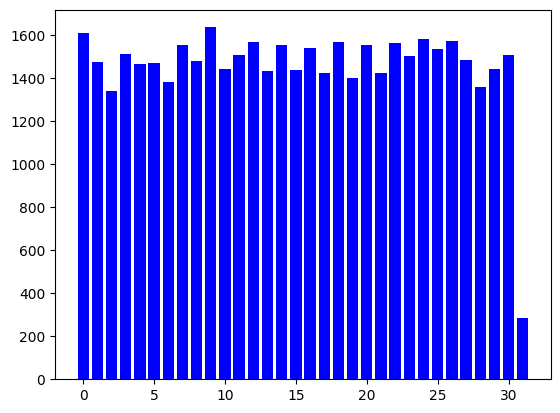

In [72]:
Y = [ len(y) for y in docs]
plt.bar(range(len(docs)), Y, color="b")